### Tests using various Outlier Detection models provided by PyOD

In [1]:
from preprocessing import preprocess
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from pyod.models.copod import COPOD
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP

In [2]:
train_file = "data/FRISS_ClaimHistory_training.csv"
test_file = "data/FRISS_ClaimHistory_test.csv"
fraud_file = "data/fraud_cases.csv"

train, test = preprocess(train_file, test_file, fraud_file)

Finished preprocessing.
Dropped 182 Train entries.
Dropped 43 Test entries.
Preprocessing took 1.45 seconds


In [3]:
drop_cols = ["sys_fraud", "sys_claimid", 'occurred_year', 'occurred_month',
       'occurred_day', 'reported_year', 'reported_month', 'reported_day',
       'prev_claims']

X_train = train.drop(columns=drop_cols)
y_train = train["sys_fraud"]

X_test = test.drop(columns=drop_cols)
y_test = test["sys_fraud"]

In [4]:
def print_metrics(y, preds):
  print("- Accuracy: {0:.4f}".format(accuracy_score(preds, y)))
  print("- Balanced Accuracy: {0:.4f}".format(balanced_accuracy_score(y, preds)))
  print("- Precision: {0:.4f}".format(precision_score(preds, y)))
  print("- Recall: {0:.4f}".format(recall_score(preds, y)))
  print("- F1: {0:.4f}".format(f1_score(preds, y)))
  cm = confusion_matrix(y, preds)
  cmd_obj = ConfusionMatrixDisplay(cm) 
  cmd_obj.plot()

In [5]:
contamination = y_train.value_counts()[1]/len(y_train)

- Accuracy: 0.3389
- Balanced Accuracy: 0.4883
- Precision: 0.6397
- Recall: 0.0066
- F1: 0.0130


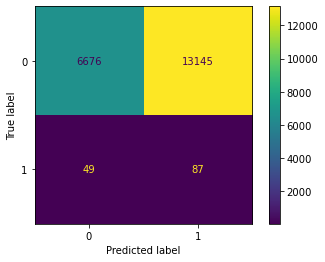

In [6]:
# Angle-based Outlier Detector (ABOD)
clf = ABOD(contamination=contamination)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

- Accuracy: 0.9833
- Balanced Accuracy: 0.5096
- Precision: 0.0294
- Recall: 0.0195
- F1: 0.0235


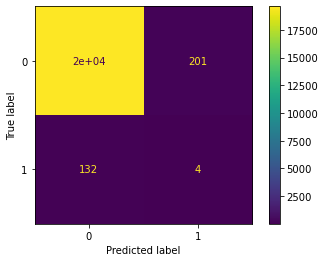

In [7]:
# Cluster-based Local Outlier Factor (CBLOF)
clf = CBLOF(contamination=contamination, check_estimator=False, random_state=0)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

- Accuracy: 0.5474
- Balanced Accuracy: 0.5348
- Precision: 0.5221
- Recall: 0.0079
- F1: 0.0155


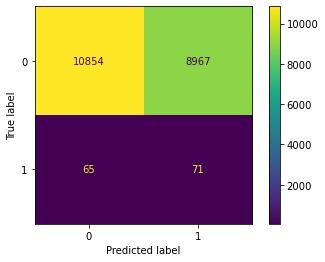

In [8]:
# Feature Bagging
clf = FeatureBagging(LOF(n_neighbors=35), contamination=contamination, random_state=0)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

- Accuracy: 0.5904
- Balanced Accuracy: 0.5090
- Precision: 0.4265
- Recall: 0.0071
- F1: 0.0140


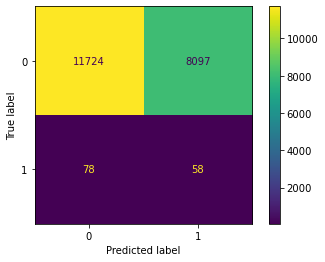

In [9]:
# Histogram-base Outlier Detection (HBOS)
clf = HBOS(contamination=contamination)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

/home/orlando/anaconda3/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


- Accuracy: 0.9073
- Balanced Accuracy: 0.5042
- Precision: 0.0956
- Recall: 0.0075
- F1: 0.0139


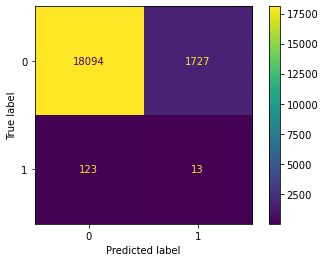

In [10]:
#Isolation Forest 
clf = IForest(contamination=contamination, random_state=0)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

- Accuracy: 0.5208
- Balanced Accuracy: 0.5032
- Precision: 0.4853
- Recall: 0.0069
- F1: 0.0136


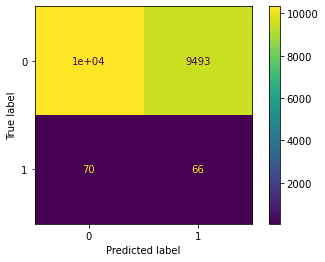

In [11]:
#K Nearest Neighbors (KNN)
clf = KNN(contamination=contamination)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

- Accuracy: 0.4706
- Balanced Accuracy: 0.4961
- Precision: 0.5221
- Recall: 0.0067
- F1: 0.0133


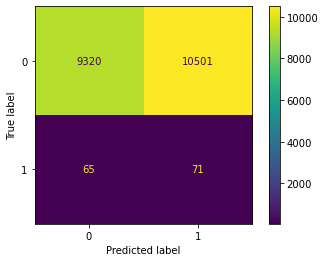

In [12]:
# Average KNN'
clf = KNN(method='mean', contamination=contamination)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

- Accuracy: 0.5875
- Balanced Accuracy: 0.5002
- Precision: 0.4118
- Recall: 0.0068
- F1: 0.0134


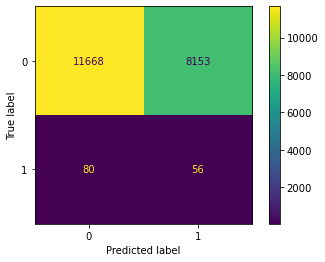

In [13]:
# Local Outlier Factor (LOF)
clf = LOF(n_neighbors=35, contamination=contamination)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

/home/orlando/anaconda3/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


- Accuracy: 0.3267
- Balanced Accuracy: 0.4931
- Precision: 0.6618
- Recall: 0.0067
- F1: 0.0132


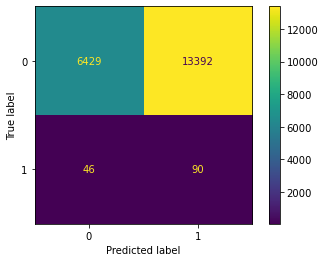

In [14]:
# Minimum Covariance Determinant (MCD)
clf = MCD(contamination=contamination, random_state=0)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

/home/orlando/anaconda3/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


- Accuracy: 0.9631
- Balanced Accuracy: 0.5031
- Precision: 0.0368
- Recall: 0.0082
- F1: 0.0134


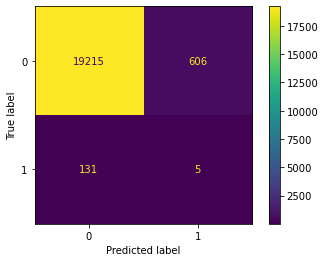

In [15]:
#One-class SVM (OCSVM)
clf = OCSVM(contamination=contamination)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

- Accuracy: 0.3384
- Balanced Accuracy: 0.4990
- Precision: 0.6618
- Recall: 0.0068
- F1: 0.0134


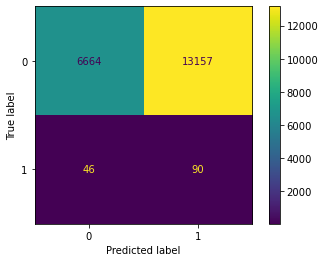

In [16]:
# Principal Component Analysis (PCA)
clf = PCA(contamination=contamination, random_state=0)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

In [ ]:
# Locally Selective Combination (LSCP)
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]
clf = LSCP(detector_list, contamination=contamination, random_state=0)
clf.fit(X_train)

preds = clf.predict(X_test)
print_metrics(y_test, preds)

/home/orlando/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/orlando/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())
